In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7f973252a250>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  n_jobs=2, passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9839039909709154

In [9]:
stacking_regressor2 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb, n_jobs=1,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [10]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7f973252a250>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  n_jobs=1, passthrough=True)

In [11]:
stacking_regressor2.score(X,y)

0.9839039909709154

In [12]:
stacking_regressor3 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [13]:
stacking_regressor3.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7f973252a250>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  passthrough=True)

In [14]:
stacking_regressor3.score(X,y)

0.9839039909709154

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [15]:
stacking_regressor4 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb,
                                        cv=5,
                                        passthrough=True)

In [16]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7f973252a250>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  passthrough=True)

In [17]:
stacking_regressor4.score(X,y)

0.9833014343465981

In [18]:
stacking_regressor5 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb,
                                        cv=5,
                                        passthrough=True)

In [19]:
stacking_regressor5.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7f973252a250>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  passthrough=True)

In [20]:
stacking_regressor5.score(X,y)

0.9833014343465981

In [21]:
stacking_regressor6 = StackingRegressor(estimators=[('CB', cb)], final_estimator=gb, passthrough=True)

In [22]:
stacking_regressor6.fit(X,y)

StackingRegressor(estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7f973252a250>)],
                  final_estimator=GradientBoostingRegressor(random_state=1),
                  passthrough=True)

In [23]:
stacking_regressor6.score(X,y)

0.9833014343465981

### scores1, scores2, scores3 --> produce same results (same StackingRegressor + same cv)

### scores4, scores5, scores5 --> produce same results (same StackingRegressor w/default cv for train, same cv for test)

In [24]:
scores1 = cross_validate(stacking_regressor1, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [25]:
scores1

{'fit_time': array([7.7823348 , 8.07067609, 9.01488614, 8.3339777 , 8.10559797]),
 'score_time': array([0.00413394, 0.00433207, 0.00420308, 0.00464201, 0.00415826]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f971a486a60>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f971a468430>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                     

In [26]:
scores2 = cross_validate(stacking_regressor2, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [27]:
scores2

{'fit_time': array([10.68558097, 10.75856996, 10.15702033, 10.07479811, 10.17799282]),
 'score_time': array([0.00418806, 0.00407195, 0.00404882, 0.00394607, 0.00419307]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f971a46f550>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f97327d11c0>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                

In [28]:
scores3 = cross_validate(stacking_regressor3, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [29]:
scores3

{'fit_time': array([ 9.98243785, 10.30821276, 10.11541891, 11.32154202, 10.32283306]),
 'score_time': array([0.00399208, 0.00404906, 0.00411916, 0.00410891, 0.00407887]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f97326fe400>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f971a694550>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('CB',
                                 <ca

In [30]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [31]:
scores4

{'fit_time': array([10.05774689, 10.1237061 , 10.10588813, 10.04338908, 10.10373688]),
 'score_time': array([0.00408602, 0.004071  , 0.00405812, 0.00411677, 0.0040791 ]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f971a46f910>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f971a46f370>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f9710732e50>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    p

In [32]:
scores5 = cross_validate(stacking_regressor5, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [33]:
scores5

{'fit_time': array([ 9.95777464, 10.07348466, 10.13010192, 10.0591743 , 10.23730803]),
 'score_time': array([0.00402212, 0.00412107, 0.00409889, 0.00399494, 0.00409102]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f97327d1fd0>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f973292ff10>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f971a6966a0>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    p

In [34]:
scores6 = cross_validate(stacking_regressor6, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [35]:
scores6

{'fit_time': array([10.46879601, 10.06301284, 10.12555289, 10.05657983, 10.09650683]),
 'score_time': array([0.00409508, 0.00407004, 0.0040803 , 0.00404716, 0.00408292]),
 'estimator': [StackingRegressor(estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f973292fb80>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f9710961fa0>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(estimators=[('CB',
                                 <catboost.core.CatBoostRegressor object at 0x7f971a691a90>)],
                    final_estimator=GradientBoostingRegressor(random_state=1),
                    passthrough=True),
  StackingRegressor(estimators=[('CB',
                     

In [36]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [37]:
cat = evaluate_model(cb, X, y)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [38]:
cat

,fit_time,score_time,test_score
0,6.212084,0.010273,0.926950
1,6.448905,0.010253,0.898789
2,6.263263,0.027450,0.936517
3,6.245134,0.007445,0.929022
4,6.560882,0.009026,0.950638
5,6.491051,0.008367,0.936688
6,6.316758,0.006334,0.942846
7,6.227411,0.011687,0.926769
8,5.699973,0.004950,0.945508
9,5.699750,0.004175,0.884738


In [39]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [40]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [41]:
g = evaluate_model(gb, X, y)

In [42]:
g

,fit_time,score_time,test_score
0,0.942679,0.002485,0.916466
1,0.939188,0.002550,0.832746
2,0.947847,0.005029,0.913140
3,0.957049,0.002460,0.900737
4,0.961355,0.003958,0.931130
5,0.953571,0.002441,0.911643
6,0.956110,0.002382,0.924417
7,0.952289,0.002365,0.907012
8,0.912421,0.002239,0.926922
9,0.914453,0.003901,0.838528


In [43]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [44]:
g

,gb_score
0,0.916466
1,0.832746
2,0.913140
3,0.900737
4,0.931130
5,0.911643
6,0.924417
7,0.907012
8,0.926922
9,0.838528


In [45]:
df1 = evaluate_model(stacking_regressor1, X, y)

In [46]:
df1

,fit_time,score_time,test_score
0,52.211439,0.004295,0.921925
1,52.168155,0.004847,0.828155
2,52.175482,0.005200,0.927609
3,48.254616,0.008189,0.919959
4,52.026625,0.019002,0.943406
5,28.956373,0.004666,0.919339
6,52.145009,0.009724,0.944487
7,31.576990,0.006043,0.923588
8,26.593493,0.010324,0.948813
9,28.581515,0.007894,0.866687


In [47]:
df1 = df1[['test_score']].rename(columns={'test_score':'test_score_1'})

In [48]:
df1

,test_score_1
0,0.921925
1,0.828155
2,0.927609
3,0.919959
4,0.943406
5,0.919339
6,0.944487
7,0.923588
8,0.948813
9,0.866687


In [49]:
df2 = evaluate_model(stacking_regressor2, X, y)

In [50]:
df2

,fit_time,score_time,test_score
0,43.928719,0.006586,0.921925
1,56.691869,0.012846,0.828155
2,31.350992,0.010829,0.927609
3,40.522641,0.026987,0.919959
4,31.208979,0.005927,0.943406
5,46.574093,0.028463,0.919339
6,32.883424,0.012088,0.944487
7,30.613141,0.007957,0.923588
8,26.565811,0.008339,0.948813
9,42.558590,0.004738,0.866687


In [51]:
df2 = df2[['test_score']].rename(columns={'test_score':'test_score_2'})

In [52]:
df2

,test_score_2
0,0.921925
1,0.828155
2,0.927609
3,0.919959
4,0.943406
5,0.919339
6,0.944487
7,0.923588
8,0.948813
9,0.866687


In [53]:
df3 = evaluate_model(stacking_regressor3, X, y)

In [54]:
df3

,fit_time,score_time,test_score
0,33.385652,0.005156,0.921925
1,39.076120,0.010861,0.828155
2,43.160417,0.030915,0.927609
3,37.512533,0.006040,0.919959
4,47.302721,0.005589,0.943406
5,39.231963,0.008808,0.919339
6,38.976059,0.010955,0.944487
7,33.993826,0.007000,0.923588
8,44.173768,0.006058,0.948813
9,44.770921,0.005637,0.866687


In [55]:
df3 = df3[['test_score']].rename(columns={'test_score':'test_score_3'})

In [56]:
df3

,test_score_3
0,0.921925
1,0.828155
2,0.927609
3,0.919959
4,0.943406
5,0.919339
6,0.944487
7,0.923588
8,0.948813
9,0.866687


In [57]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [58]:
df4

,fit_time,score_time,test_score
0,44.075453,0.004556,0.920853
1,48.764974,0.009806,0.827715
2,45.898249,0.007601,0.931487
3,38.260289,0.008995,0.930539
4,34.626358,0.006608,0.949324
5,48.191774,0.009768,0.916563
6,49.120782,0.010192,0.946227
7,41.255069,0.012324,0.906434
8,27.408845,0.008933,0.947071
9,40.122846,0.004214,0.876116


In [59]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [60]:
df4

,test_score_4
0,0.920853
1,0.827715
2,0.931487
3,0.930539
4,0.949324
5,0.916563
6,0.946227
7,0.906434
8,0.947071
9,0.876116


In [61]:
df5 = evaluate_model(stacking_regressor5, X, y)

In [62]:
df5

,fit_time,score_time,test_score
0,52.724723,0.009762,0.920853
1,53.339208,0.010581,0.827715
2,52.545816,0.011014,0.931487
3,52.128114,0.008343,0.930539
4,52.879175,0.009202,0.949324
5,53.299731,0.011346,0.916563
6,39.614800,0.006975,0.946227
7,26.522889,0.017354,0.906434
8,25.782033,0.008506,0.947071
9,27.530424,0.007652,0.876116


In [63]:
df5 = df5[['test_score']].rename(columns={'test_score':'test_score_5'})

In [64]:
df5

,test_score_5
0,0.920853
1,0.827715
2,0.931487
3,0.930539
4,0.949324
5,0.916563
6,0.946227
7,0.906434
8,0.947071
9,0.876116


In [65]:
df6 = evaluate_model(stacking_regressor6, X, y)

In [66]:
df6

,fit_time,score_time,test_score
0,29.270605,0.007625,0.920853
1,43.886441,0.010008,0.827715
2,43.285016,0.008910,0.931487
3,43.194310,0.013900,0.930539
4,43.115247,0.010410,0.949324
5,29.374814,0.009095,0.916563
6,43.530681,0.010849,0.946227
7,43.106476,0.008452,0.906434
8,32.254471,0.010265,0.947071
9,42.295383,0.007807,0.876116


In [67]:
df6 = df6[['test_score']].rename(columns={'test_score':'test_score_6'})

In [68]:
df6

,test_score_6
0,0.920853
1,0.827715
2,0.931487
3,0.930539
4,0.949324
5,0.916563
6,0.946227
7,0.906434
8,0.947071
9,0.876116


In [69]:
combo = pd.concat([cat, g, df1, df2, df3, df4, df5, df6], axis=1)

In [70]:
combo

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
0,0.926950,0.916466,0.921925,0.921925,0.921925,0.920853,0.920853,0.920853
1,0.898789,0.832746,0.828155,0.828155,0.828155,0.827715,0.827715,0.827715
2,0.936517,0.913140,0.927609,0.927609,0.927609,0.931487,0.931487,0.931487
3,0.929022,0.900737,0.919959,0.919959,0.919959,0.930539,0.930539,0.930539
4,0.950638,0.931130,0.943406,0.943406,0.943406,0.949324,0.949324,0.949324
5,0.936688,0.911643,0.919339,0.919339,0.919339,0.916563,0.916563,0.916563
6,0.942846,0.924417,0.944487,0.944487,0.944487,0.946227,0.946227,0.946227
7,0.926769,0.907012,0.923588,0.923588,0.923588,0.906434,0.906434,0.906434
8,0.945508,0.926922,0.948813,0.948813,0.948813,0.947071,0.947071,0.947071
9,0.884738,0.838528,0.866687,0.866687,0.866687,0.876116,0.876116,0.876116


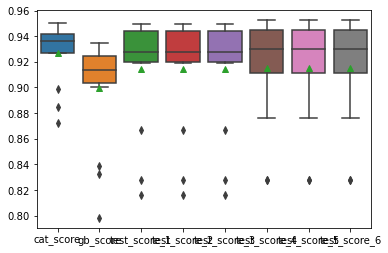

In [71]:
sns.boxplot(data=combo, showmeans=True);

In [72]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926683,0.899726,0.914469,0.914469,0.914469,0.915503,0.915503,0.915503
std,0.023191,0.041473,0.042556,0.042556,0.042556,0.040614,0.040614,0.040614
min,0.872051,0.798137,0.816236,0.816236,0.816236,0.827715,0.827715,0.827715
25%,0.926860,0.903875,0.919649,0.919649,0.919649,0.911498,0.911498,0.911498
50%,0.936517,0.913265,0.927609,0.927609,0.927609,0.929944,0.929944,0.929944
75%,0.942064,0.924419,0.943802,0.943802,0.943802,0.944778,0.944778,0.944778
max,0.950638,0.934496,0.949161,0.949161,0.949161,0.952405,0.952405,0.952405
